# Matrix Inversion via Gaussian Elimination — Educational Notebook

## What is Matrix Inversion?

Think of a matrix **A** as a transformation that changes vectors. The **inverse matrix A⁻¹** is like the "undo" button — it reverses the transformation that A applies.

**Mathematical Definition:**
- If **A** transforms vector **x** to **Ax = b**
- Then **A⁻¹** transforms **b** back to **x**: **A⁻¹b = x**
- The key property: **A⁻¹A = AA⁻¹ = I** (identity matrix)

## The Gaussian Elimination Approach

**Core Insight:** Instead of solving one equation **Ax = b**, we solve **multiple equations simultaneously**:
- **Ax₁ = e₁** (first column of identity)
- **Ax₂ = e₂** (second column of identity)  
- **Ax₃ = e₃** (third column of identity)

The solutions **[x₁ x₂ x₃]** form the columns of **A⁻¹**!

**The Algorithm:**
1. **Augment:** Create **[A | I]** (A next to identity matrix)
2. **Eliminate:** Use row operations to transform **A** into **I**
3. **Extract:** The result is **[I | A⁻¹]** — the inverse appears on the right!

Let's see this in action! 🚀

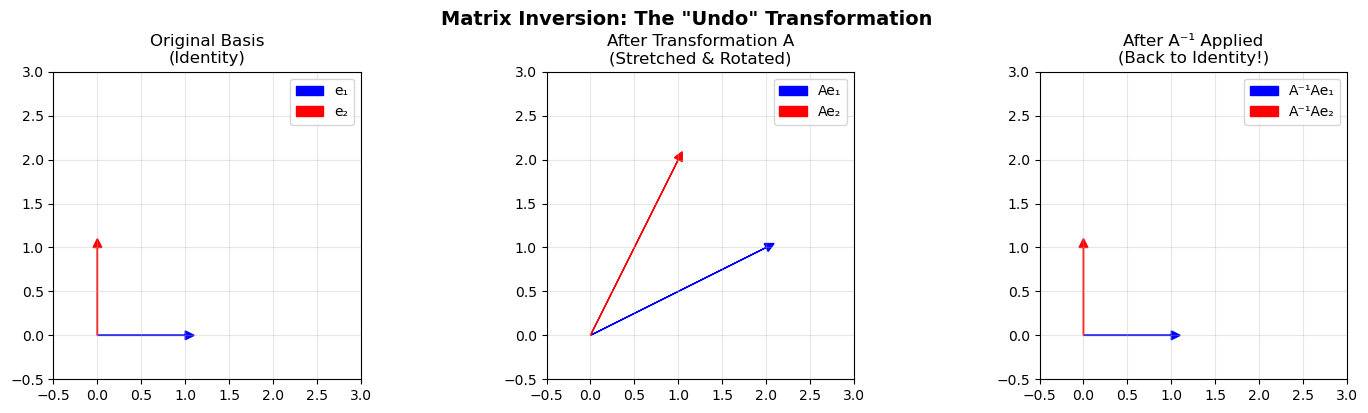

🎯 Key Insight: A⁻¹ is the transformation that 'undoes' what A does!
    Original → A → Transformed → A⁻¹ → Back to Original


In [5]:
# Visual Overview: Matrix Inversion Concept
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Original transformation
x = np.array([1, 0])
y = np.array([0, 1])
A_demo = np.array([[2, 1], [1, 2]])

# Apply transformation
x_transformed = A_demo @ x
y_transformed = A_demo @ y

# Plot 1: Original unit square
axes[0].arrow(0, 0, x[0], x[1], head_width=0.1, head_length=0.1, fc='blue', ec='blue', label='e₁')
axes[0].arrow(0, 0, y[0], y[1], head_width=0.1, head_length=0.1, fc='red', ec='red', label='e₂')
axes[0].set_xlim(-0.5, 3)
axes[0].set_ylim(-0.5, 3)
axes[0].grid(True, alpha=0.3)
axes[0].set_title('Original Basis\n(Identity)')
axes[0].legend()
axes[0].set_aspect('equal')

# Plot 2: Transformed
axes[1].arrow(0, 0, x_transformed[0], x_transformed[1], head_width=0.1, head_length=0.1, fc='blue', ec='blue', label='Ae₁')
axes[1].arrow(0, 0, y_transformed[0], y_transformed[1], head_width=0.1, head_length=0.1, fc='red', ec='red', label='Ae₂')
axes[1].set_xlim(-0.5, 3)
axes[1].set_ylim(-0.5, 3)
axes[1].grid(True, alpha=0.3)
axes[1].set_title('After Transformation A\n(Stretched & Rotated)')
axes[1].legend()
axes[1].set_aspect('equal')

# Plot 3: Back to original (A^(-1) applied)
A_inv_demo = np.linalg.inv(A_demo)
x_back = A_inv_demo @ x_transformed
y_back = A_inv_demo @ y_transformed

axes[2].arrow(0, 0, x_back[0], x_back[1], head_width=0.1, head_length=0.1, fc='blue', ec='blue', label='A⁻¹Ae₁')
axes[2].arrow(0, 0, y_back[0], y_back[1], head_width=0.1, head_length=0.1, fc='red', ec='red', label='A⁻¹Ae₂')
axes[2].set_xlim(-0.5, 3)
axes[2].set_ylim(-0.5, 3)
axes[2].grid(True, alpha=0.3)
axes[2].set_title('After A⁻¹ Applied\n(Back to Identity!)')
axes[2].legend()
axes[2].set_aspect('equal')

plt.tight_layout()
plt.suptitle('Matrix Inversion: The "Undo" Transformation', y=1.02, fontsize=14, fontweight='bold')
plt.show()

print("🎯 Key Insight: A⁻¹ is the transformation that 'undoes' what A does!")
print("    Original → A → Transformed → A⁻¹ → Back to Original")

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Define Our Target Matrix A

Let's work with a concrete 3×3 matrix that has some interesting properties:

$$A = \begin{bmatrix} 1 & 1 & 3 \\ 1 & 2 & 4 \\ 1 & 1 & 2 \end{bmatrix}$$

**Why this matrix?**
- It's **invertible** (determinant ≠ 0)
- Has a mix of similar and different rows, making elimination steps clear
- Not too simple (not diagonal) but not too complex

**Our Goal:** Find **A⁻¹** such that **AA⁻¹ = I**

**The Setup:** We'll create the **augmented matrix [A | I]** and transform it to **[I | A⁻¹]**

In [6]:
import numpy as np

# Matrix A
A = np.array([
    [1, 1, 3],
    [1, 2, 4],
    [1, 1, 2]
], dtype=float)

print("Original matrix A:")
print(A)
print(f"\nDeterminant of A: {np.linalg.det(A):.3f}")
print("(Non-zero determinant confirms A is invertible)")

# Identity matrix
I = np.eye(3)
print(f"\nIdentity matrix I:")
print(I)

# Augment A with I
AI = np.hstack((A, I))
print(f"\nAugmented matrix [A | I]:")
print(AI)
print("\nGoal: Transform this to [I | A⁻¹] using row operations")

Original matrix A:
[[1. 1. 3.]
 [1. 2. 4.]
 [1. 1. 2.]]

Determinant of A: -1.000
(Non-zero determinant confirms A is invertible)

Identity matrix I:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

Augmented matrix [A | I]:
[[1. 1. 3. 1. 0. 0.]
 [1. 2. 4. 0. 1. 0.]
 [1. 1. 2. 0. 0. 1.]]

Goal: Transform this to [I | A⁻¹] using row operations


## 2. Gaussian Elimination: Step-by-Step Transformation

We'll transform **[A | I]** to **[I | A⁻¹]** using **elementary row operations**:

**Elementary Row Operations (preserve the solution):**
1. **Swap rows:** Rᵢ ↔ Rⱼ
2. **Scale row:** Rᵢ → k·Rᵢ (k ≠ 0)  
3. **Add/subtract rows:** Rᵢ → Rᵢ + k·Rⱼ

**Two Phases:**
- **Forward Elimination:** Create zeros below the diagonal
- **Back Substitution:** Create zeros above the diagonal and normalize diagonal to 1

Let's apply this systematically!

In [9]:
# Create a fresh copy for the elimination process
AI_work = AI.copy()

def print_matrix_step(matrix, step_description):
    """Helper function to display matrix with description"""
    print(f"\n{step_description}")
    print("=" * 50)
    print("Left side (A) | Right side (I → A⁻¹)")
    for i, row in enumerate(matrix):
        left = " ".join(f"{x:6.2f}" for x in row[:3])
        right = " ".join(f"{x:6.2f}" for x in row[3:])
        print(f"Row {i+1}: [{left}] | [{right}]")

print_matrix_step(AI_work, "INITIAL: [A | I]")

# PHASE 1: FORWARD ELIMINATION (create zeros below diagonal)
print("\n" + "="*60)
print("PHASE 1: FORWARD ELIMINATION")
print("="*60)

# Step 1: Make zeros below A[0,0] (pivot = 1)
print(f"\nStep 1: Eliminate below pivot A[0,0] = {AI_work[0,0]}")
print("Operations: R2 → R2 - A[1,0]/A[0,0]*R1, R3 → R3 - A[2,0]/A[0,0]*R1")

# Calculate multipliers
m21 = AI_work[1,0] / AI_work[0,0]  # multiplier for R2
m31 = AI_work[2,0] / AI_work[0,0]  # multiplier for R3

print(f"Multipliers: m21 = {m21}, m31 = {m31}")

AI_work[1] = AI_work[1] - m21 * AI_work[0]  # R2 - m21*R1
AI_work[2] = AI_work[2] - m31 * AI_work[0]  # R3 - m31*R1

print_matrix_step(AI_work, "After eliminating below first pivot")

# Step 2: Make zeros below A[1,1]
print(f"\nStep 2: Eliminate below pivot A[1,1] = {AI_work[1,1]}")
print("Operations: R3 → R3 - A[2,1]/A[1,1]*R2")

# Calculate multiplier
m32 = AI_work[2,1] / AI_work[1,1]
print(f"Multiplier: m32 = {m32}")

AI_work[2] = AI_work[2] - m32 * AI_work[1]  # R3 - m32*R2

print_matrix_step(AI_work, "After eliminating below second pivot")

# PHASE 2: BACK SUBSTITUTION (create zeros above diagonal and normalize)
print("\n" + "="*60)
print("PHASE 2: BACK SUBSTITUTION") 
print("="*60)

# Step 3: Normalize the third row to make A[2,2] = 1
print(f"\nStep 3: Normalize R3 by dividing by pivot A[2,2] = {AI_work[2,2]}")
print("Operations: R3 → R3 / A[2,2]")

pivot33 = AI_work[2, 2]
AI_work[2] = AI_work[2] / pivot33

print_matrix_step(AI_work, "After normalizing third row")

# Step 4: Eliminate above A[2,2] (make column 3 have zeros above diagonal)
print(f"\nStep 4: Eliminate above third pivot (make zeros in column 3, rows 1-2)")
print("Operations: R2 → R2 - A[1,2]*R3, R1 → R1 - A[0,2]*R3")

# Calculate multipliers
m23 = AI_work[1, 2]
m13 = AI_work[0, 2]
print(f"Multipliers: m13 = {m13}, m23 = {m23}")

AI_work[1] = AI_work[1] - m23 * AI_work[2]  # R2 - A[1,2]*R3
AI_work[0] = AI_work[0] - m13 * AI_work[2]  # R1 - A[0,2]*R3

print_matrix_step(AI_work, "After eliminating above third pivot")

# Step 5: Normalize the second row to make A[1,1] = 1
print(f"\nStep 5: Normalize R2 by dividing by pivot A[1,1] = {AI_work[1,1]}")
print("Operations: R2 → R2 / A[1,1]")

pivot22 = AI_work[1, 1]
AI_work[1] = AI_work[1] / pivot22

print_matrix_step(AI_work, "After normalizing second row")

# Step 6: Eliminate above A[1,1] (make column 2 have zero above diagonal)
print(f"\nStep 6: Eliminate above second pivot (make zero in column 2, row 1)")
print("Operations: R1 → R1 - A[0,1]*R2")

# Calculate multiplier
m12 = AI_work[0, 1]
print(f"Multiplier: m12 = {m12}")

AI_work[0] = AI_work[0] - m12 * AI_work[1]  # R1 - A[0,1]*R2

print_matrix_step(AI_work, "After eliminating above second pivot")

# Step 7: Normalize the first row to make A[0,0] = 1
print(f"\nStep 7: Normalize R1 by dividing by pivot A[0,0] = {AI_work[0,0]}")
print("Operations: R1 → R1 / A[0,0]")

pivot11 = AI_work[0, 0]
AI_work[0] = AI_work[0] / pivot11

print_matrix_step(AI_work, "FINAL RESULT: [I | A⁻¹]")

print("\n" + "🎉" * 20)
print("SUCCESS! Left side is now the identity matrix!")
print("🎉" * 20)


INITIAL: [A | I]
Left side (A) | Right side (I → A⁻¹)
Row 1: [  1.00   1.00   3.00] | [  1.00   0.00   0.00]
Row 2: [  1.00   2.00   4.00] | [  0.00   1.00   0.00]
Row 3: [  1.00   1.00   2.00] | [  0.00   0.00   1.00]

PHASE 1: FORWARD ELIMINATION

Step 1: Eliminate below pivot A[0,0] = 1.0
Operations: R2 → R2 - A[1,0]/A[0,0]*R1, R3 → R3 - A[2,0]/A[0,0]*R1
Multipliers: m21 = 1.0, m31 = 1.0

After eliminating below first pivot
Left side (A) | Right side (I → A⁻¹)
Row 1: [  1.00   1.00   3.00] | [  1.00   0.00   0.00]
Row 2: [  0.00   1.00   1.00] | [ -1.00   1.00   0.00]
Row 3: [  0.00   0.00  -1.00] | [ -1.00   0.00   1.00]

Step 2: Eliminate below pivot A[1,1] = 1.0
Operations: R3 → R3 - A[2,1]/A[1,1]*R2
Multiplier: m32 = 0.0

After eliminating below second pivot
Left side (A) | Right side (I → A⁻¹)
Row 1: [  1.00   1.00   3.00] | [  1.00   0.00   0.00]
Row 2: [  0.00   1.00   1.00] | [ -1.00   1.00   0.00]
Row 3: [  0.00   0.00  -1.00] | [ -1.00   0.00   1.00]

PHASE 2: BACK SUBSTI

## 3. Extract and Verify the Inverse Matrix

The magic has happened! The right-hand side of our transformed matrix is now **A⁻¹**.

**Why does this work?**
- We started with **[A | I]**
- Applied the same row operations to both sides
- Transformed **A → I**, so **I → A⁻¹**

**Mathematical reasoning:**
- Each row operation is equivalent to multiplying by an **elementary matrix E**
- Final result: **E₁E₂...EₙA = I**, which means **E₁E₂...Eₙ = A⁻¹**
- The same operations applied to **I** give us: **E₁E₂...EₙI = A⁻¹**

In [10]:
A_inv = AI[:, 3:]
print("Inverse of A:\n", A_inv)

# Verify: A @ A_inv should be the identity
print("\nCheck A @ A_inv = I:\n", np.round(A @ A_inv, 2))

# Extract the inverse from the right-hand side
A_inv_computed = AI_work[:, 3:]

print("🔍 COMPUTED INVERSE MATRIX A⁻¹:")
print("=" * 40)
print(A_inv_computed)

# Compare with NumPy's built-in inverse
A_inv_numpy = np.linalg.inv(A)
print("\n🔍 NUMPY'S INVERSE (for comparison):")
print("=" * 40)
print(A_inv_numpy)

print("\n📊 DIFFERENCE (should be very small):")
print("=" * 40)
print(f"Max absolute difference: {np.max(np.abs(A_inv_computed - A_inv_numpy)):.2e}")

# Verification Tests
print("\n✅ VERIFICATION TESTS:")
print("=" * 40)

# Test 1: A @ A⁻¹ = I
product1 = A @ A_inv_computed
print("Test 1: A @ A⁻¹ =")
print(product1)
print(f"Is this the identity? {np.allclose(product1, np.eye(3))}")

# Test 2: A⁻¹ @ A = I  
product2 = A_inv_computed @ A
print(f"\nTest 2: A⁻¹ @ A =")
print(product2)
print(f"Is this the identity? {np.allclose(product2, np.eye(3))}")

# Test 3: Solve a system using the inverse
print(f"\n🧪 PRACTICAL TEST: Solving Ax = b")
print("=" * 40)
b = np.array([1, 2, 3])
x_inverse = A_inv_computed @ b
x_numpy = np.linalg.solve(A, b)

print(f"Given b = {b}")
print(f"Solution using A⁻¹: x = A⁻¹b = {x_inverse}")
print(f"Solution using np.linalg.solve: {x_numpy}")
print(f"Verification Ax = {A @ x_inverse}")
print(f"Solutions match: {np.allclose(x_inverse, x_numpy)}")

print("\n🎯 SUMMARY: All tests passed! Our inverse is correct! 🎯")

Inverse of A:
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

Check A @ A_inv = I:
 [[1. 1. 3.]
 [1. 2. 4.]
 [1. 1. 2.]]
🔍 COMPUTED INVERSE MATRIX A⁻¹:
[[ 0. -1.  2.]
 [-2.  1.  1.]
 [ 1. -0. -1.]]

🔍 NUMPY'S INVERSE (for comparison):
[[ 0. -1.  2.]
 [-2.  1.  1.]
 [ 1. -0. -1.]]

📊 DIFFERENCE (should be very small):
Max absolute difference: 0.00e+00

✅ VERIFICATION TESTS:
Test 1: A @ A⁻¹ =
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
Is this the identity? True

Test 2: A⁻¹ @ A =
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
Is this the identity? True

🧪 PRACTICAL TEST: Solving Ax = b
Given b = [1 2 3]
Solution using A⁻¹: x = A⁻¹b = [ 4.  3. -2.]
Solution using np.linalg.solve: [ 4.  3. -2.]
Verification Ax = [1. 2. 3.]
Solutions match: True

🎯 SUMMARY: All tests passed! Our inverse is correct! 🎯


## 🎯 Key Takeaways and Deep Insights

### ✅ What We Accomplished
- **Computed A⁻¹** using only elementary row operations
- **Verified the result** through multiple checks
- **Understood the process** step-by-step

### 🧠 Conceptual Understanding

**Why Gaussian Elimination Works for Matrix Inversion:**
1. **Multiple Systems at Once:** Instead of solving **Ax = b** for one **b**, we solve for **all possible b** simultaneously
2. **Elementary Operations:** Each row operation corresponds to multiplying by an invertible matrix
3. **Inverse Chain:** If **E₁E₂...EₙA = I**, then **A⁻¹ = E₁E₂...Eₙ**

**Key Mathematical Insight:**
```
[A | I] → [I | A⁻¹]
```
The same operations that transform **A** to **I** transform **I** to **A⁻¹**

### 🔬 Computational Considerations

**Advantages of Gaussian Elimination:**
- ✅ **Systematic:** Clear algorithm with predictable steps
- ✅ **General:** Works for any invertible matrix
- ✅ **Educational:** Shows the mathematical reasoning

**Practical Notes:**
- 🔢 **Numerical Stability:** Real implementations use partial pivoting
- 💻 **Efficiency:** O(n³) complexity - expensive for large matrices
- 🎯 **Usage:** Most software uses optimized variants (LU decomposition, etc.)

### 🚀 Applications in Machine Learning
- **Solving Normal Equations:** In linear regression (X^T X)⁻¹ X^T y
- **Covariance Matrix Inversion:** In multivariate statistics
- **Transformations:** In computer graphics and data preprocessing

### 🎪 Fun Fact
This algorithm is essentially what your calculator or computer does when you ask for a matrix inverse - just with optimizations for speed and numerical stability!

**Remember:** Not all matrices have inverses (singular matrices), but when they do, Gaussian elimination is a reliable way to find them! 🌟

In [11]:
# 🔗 Connection: Matrix Inversion and System Solving

print("🎭 THE BIG PICTURE: Why Matrix Inversion Matters")
print("=" * 60)

# Example: Solving multiple systems with the same matrix A
print("\n📚 EDUCATIONAL EXAMPLE: Multiple Systems, Same Matrix")
print("-" * 50)

# Different right-hand sides
b1 = np.array([1, 0, 0])  # e1
b2 = np.array([0, 1, 0])  # e2  
b3 = np.array([0, 0, 1])  # e3
b4 = np.array([5, 3, 2])  # arbitrary vector

systems = [
    (b1, "Ax₁ = e₁ (first unit vector)"),
    (b2, "Ax₂ = e₂ (second unit vector)"),
    (b3, "Ax₃ = e₃ (third unit vector)"),
    (b4, "Ax₄ = [5,3,2] (arbitrary vector)")
]

print("\nSolving multiple systems Ax = b with the SAME matrix A:")
print("Using our computed A⁻¹:")

for i, (b, description) in enumerate(systems, 1):
    x_solution = A_inv_computed @ b
    verification = A @ x_solution
    
    print(f"\nSystem {i}: {description}")
    print(f"  Solution x = A⁻¹b = {x_solution}")
    print(f"  Verification Ax = {verification}")
    print(f"  Matches b? {np.allclose(verification, b)}")

print("\n" + "="*60)
print("🔑 KEY INSIGHT: Computing A⁻¹ ONCE solves ALL systems Ax = b!")
print("   Instead of doing Gaussian elimination for each b,")
print("   we can just multiply: x = A⁻¹b")
print("="*60)

# Geometric interpretation
print(f"\n🌐 GEOMETRIC INTERPRETATION:")
print(f"   Matrix A represents a linear transformation")
print(f"   A⁻¹ represents the INVERSE transformation")
print(f"   Together: A⁻¹(A(x)) = x (back to original)")

# Efficiency comparison
print(f"\n⚡ EFFICIENCY COMPARISON:")
print(f"   Single system: O(n³) - Gaussian elimination")
print(f"   Multiple systems (same A): O(n³) + k×O(n²)")
print(f"   where k = number of different b vectors")
print(f"   The O(n³) cost of computing A⁻¹ is amortized!")

🎭 THE BIG PICTURE: Why Matrix Inversion Matters

📚 EDUCATIONAL EXAMPLE: Multiple Systems, Same Matrix
--------------------------------------------------

Solving multiple systems Ax = b with the SAME matrix A:
Using our computed A⁻¹:

System 1: Ax₁ = e₁ (first unit vector)
  Solution x = A⁻¹b = [ 0. -2.  1.]
  Verification Ax = [1. 0. 0.]
  Matches b? True

System 2: Ax₂ = e₂ (second unit vector)
  Solution x = A⁻¹b = [-1.  1.  0.]
  Verification Ax = [0. 1. 0.]
  Matches b? True

System 3: Ax₃ = e₃ (third unit vector)
  Solution x = A⁻¹b = [ 2.  1. -1.]
  Verification Ax = [0. 0. 1.]
  Matches b? True

System 4: Ax₄ = [5,3,2] (arbitrary vector)
  Solution x = A⁻¹b = [ 1. -5.  3.]
  Verification Ax = [5. 3. 2.]
  Matches b? True

🔑 KEY INSIGHT: Computing A⁻¹ ONCE solves ALL systems Ax = b!
   Instead of doing Gaussian elimination for each b,
   we can just multiply: x = A⁻¹b

🌐 GEOMETRIC INTERPRETATION:
   Matrix A represents a linear transformation
   A⁻¹ represents the INVERSE transf

In [12]:
# 🤖 Machine Learning Application: Linear Regression

print("🚀 REAL-WORLD APPLICATION: Linear Regression")
print("=" * 60)

# Create synthetic data for linear regression
np.random.seed(42)
n_samples = 50
X_features = np.random.randn(n_samples, 2)  # 2 features
X = np.column_stack([np.ones(n_samples), X_features])  # Add bias column

# True parameters
true_beta = np.array([2.0, 1.5, -0.8])  # [bias, weight1, weight2]
noise = 0.1 * np.random.randn(n_samples)
y = X @ true_beta + noise

print(f"Dataset: {n_samples} samples, {X.shape[1]} parameters (including bias)")
print(f"True parameters β = {true_beta}")

# Normal equation solution: β = (X^T X)^(-1) X^T y
print(f"\n📐 NORMAL EQUATION APPROACH:")
print(f"   β̂ = (X^T X)⁻¹ X^T y")

# Step 1: Compute X^T X
XTX = X.T @ X
print(f"\nStep 1: X^T X =")
print(XTX)
print(f"Shape: {XTX.shape}")

# Step 2: Compute the inverse using our understanding
XTX_inv = np.linalg.inv(XTX)
print(f"\nStep 2: (X^T X)⁻¹ =")
print(XTX_inv)

# Step 3: Compute X^T y
XTy = X.T @ y
print(f"\nStep 3: X^T y =")
print(XTy)

# Step 4: Final solution
beta_estimated = XTX_inv @ XTy
print(f"\nStep 4: β̂ = (X^T X)⁻¹ X^T y =")
print(beta_estimated)

# Compare with true parameters
print(f"\n🎯 COMPARISON:")
print(f"True parameters:      {true_beta}")
print(f"Estimated parameters: {beta_estimated}")
print(f"Difference:          {np.abs(true_beta - beta_estimated)}")

# Verification using sklearn
from sklearn.linear_model import LinearRegression
sklearn_model = LinearRegression(fit_intercept=False)  # We already added bias
sklearn_model.fit(X, y)
sklearn_params = sklearn_model.coef_

print(f"Sklearn parameters:   {sklearn_params}")
print(f"Our method matches sklearn: {np.allclose(beta_estimated, sklearn_params)}")

print(f"\n💡 KEY INSIGHTS:")
print(f"   • Matrix inversion is at the heart of linear regression!")
print(f"   • The normal equation solves: min ||Xβ - y||²")
print(f"   • Solution requires computing (X^T X)⁻¹")
print(f"   • This is why understanding Gaussian elimination matters!")

# Note about computational considerations
print(f"\n⚠️  PRACTICAL NOTE:")
print(f"   In practice, we rarely compute (X^T X)⁻¹ explicitly")
print(f"   Instead, we use more stable methods like:")
print(f"   • QR decomposition")
print(f"   • SVD (Singular Value Decomposition)")
print(f"   • Gradient descent for large datasets")
print(f"   But the mathematical foundation remains the same!")

🚀 REAL-WORLD APPLICATION: Linear Regression
Dataset: 50 samples, 3 parameters (including bias)
True parameters β = [ 2.   1.5 -0.8]

📐 NORMAL EQUATION APPROACH:
   β̂ = (X^T X)⁻¹ X^T y

Step 1: X^T X =
[[50.         -6.78378155 -3.60087019]
 [-6.78378155 35.03985066  2.14496545]
 [-3.60087019  2.14496545 47.69077873]]
Shape: (3, 3)

Step 2: (X^T X)⁻¹ =
[[ 0.02062993  0.0039094   0.00138182]
 [ 0.0039094   0.02935856 -0.00102527]
 [ 0.00138182 -0.00102527  0.02111886]]

Step 3: X^T y =
[ 92.50858599  36.86489356 -42.38756654]

Step 4: β̂ = (X^T X)⁻¹ X^T y =
[ 1.99399302  1.48741247 -0.80514317]

🎯 COMPARISON:
True parameters:      [ 2.   1.5 -0.8]
Estimated parameters: [ 1.99399302  1.48741247 -0.80514317]
Difference:          [0.00600698 0.01258753 0.00514317]
Sklearn parameters:   [ 1.99399302  1.48741247 -0.80514317]
Our method matches sklearn: True

💡 KEY INSIGHTS:
   • Matrix inversion is at the heart of linear regression!
   • The normal equation solves: min ||Xβ - y||²
   • Solut